# Loading the Dataset

In [2]:
import numpy as np # linear algebra
import pandas as pd # data manipulation and analysis
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
sns.set_style('whitegrid') # set style for visualization
import warnings # ignore warnings
warnings.filterwarnings('ignore')
import requests, zipfile, io
from sklearn.impute import KNNImputer

url = "https://github.com/devtlv/Datasets-DA-Bootcamp-2-/raw/refs/heads/main/Week%204%20-%20Data%20Understanding/W4D4%20-%20Data%20Preprocessing%20&%20T/titanic%20dataset.zip"  # replace with your link

r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall("data")

# Exercise 1: Duplicate Detection and Removal

In [3]:
# Load the train.csv dataset
titanic = pd.read_csv('./data/titanic dataset/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Get additional info
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Add a duplicate of the first row to the end
titanic = pd.concat([titanic, titanic.iloc[[0]]], ignore_index=True)

# Determine if there are any duplicate rows based on all the columns
duplicates = titanic.duplicated()
print("Number of duplicate rows (before):", duplicates.sum())

# If there were duplicate rows
titanic = titanic.drop_duplicates()
print("Number of duplicate rows (after):", titanic.duplicated().sum())

Number of duplicate rows (before): 1
Number of duplicate rows (after): 0


# Exercise 2: Handling Missing Values

In [6]:
# Identify columns with missing values
print("Total Number of Rows:", titanic.shape[0])
titanic.isnull().sum()

Total Number of Rows: 891


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Drop Unecessary Columns with Null Values
titanic = titanic.drop(['Cabin', 'Ticket', 'Embarked'], axis=1, errors='ignore')
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [8]:
# # Removal
# titanic = titanic.dropna(subset=['Embarked'])

# # Check
# print("Total Rows:", titanic.shape[0])
# titanic.isnull().sum()

In [9]:
# Fill With a Constant Value
titanic_avg_fill = titanic.copy()
titanic_avg_fill['Age'] = titanic_avg_fill['Age'].fillna(titanic_avg_fill['Age'].mean())

# Check
print("Number of Rows:", titanic_avg_fill.shape[0])
titanic_avg_fill.isnull().sum()

Number of Rows: 891


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [10]:
# Fill with imputer
imputer = KNNImputer(n_neighbors=3)

# Separate numeric and non-numeric
df_numeric = titanic.select_dtypes(include=['float64', 'int64'])
df_non_numeric = titanic.drop(columns=df_numeric.columns)

# Impute numeric part
imputed_array = imputer.fit_transform(df_numeric)
df_numeric_imputed = pd.DataFrame(imputed_array, columns=df_numeric.columns, index=df_numeric.index)

# Combine back
titanic_imputed = pd.concat([df_numeric_imputed, df_non_numeric], axis=1)

# Check
print("Number of Rows:", titanic_imputed.shape[0])
titanic_imputed.isnull().sum()

# Since I prefer the imputation method over the constant, I will now set titanic equal to the imputed version
titanic = titanic_imputed
titanic.info()


Number of Rows: 891
<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    float64
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    float64
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    float64
 5   Parch        891 non-null    float64
 6   Fare         891 non-null    float64
 7   Name         891 non-null    object 
 8   Sex          891 non-null    object 
dtypes: float64(7), object(2)
memory usage: 69.6+ KB


# Exercise 3: Feature Engineering

In [11]:
# Create the new data you wish to merge into the titanic dataset
merge_data = titanic[['PassengerId']].copy()
merge_data['Title'] = titanic['Name'].str.extract(r',\s*([^\.]+)\.', expand=False)
merge_data['Title'] = merge_data['Title'].replace({
    'Mlle': 'Miss',
    'Ms': 'Miss',
    'Mme': 'Mrs',
    'Lady': 'Royalty',
    'Countess': 'Royalty',
    'Sir': 'Royalty',
    'Don': 'Royalty',
    'Jonkheer': 'Royalty',
    'Capt': 'Officer',
    'Col': 'Officer',
    'Major': 'Officer',
    'Dr': 'Officer',
    'Rev': 'Officer'
})
merge_data['Family Size'] = titanic['SibSp'] + titanic['Parch'] + 1

# merge_data['Title'] = titanic['Name'].str.split(',').str[1].str.split('.').str[0].str.strip() does the same as regex version

# merge them into a new set
titanic_merged = pd.merge(titanic, merge_data, on='PassengerId', how='left')
titanic_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    float64
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    float64
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    float64
 5   Parch        891 non-null    float64
 6   Fare         891 non-null    float64
 7   Name         891 non-null    object 
 8   Sex          891 non-null    object 
 9   Title        891 non-null    object 
 10  Family Size  891 non-null    float64
dtypes: float64(8), object(3)
memory usage: 76.7+ KB


In [12]:
# Encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# Label Encoding 'Sex' Column
titanic_merged['Encoded Sex'] = encoder.fit_transform(titanic_merged['Sex'])

# One-Hot Encoding 'Titles Columns'
titanic_merged = pd.get_dummies(titanic_merged, columns=['Title'], drop_first=True)

titanic_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         891 non-null    float64
 1   Survived            891 non-null    float64
 2   Pclass              891 non-null    float64
 3   Age                 891 non-null    float64
 4   SibSp               891 non-null    float64
 5   Parch               891 non-null    float64
 6   Fare                891 non-null    float64
 7   Name                891 non-null    object 
 8   Sex                 891 non-null    object 
 9   Family Size         891 non-null    float64
 10  Encoded Sex         891 non-null    int64  
 11  Title_Miss          891 non-null    bool   
 12  Title_Mr            891 non-null    bool   
 13  Title_Mrs           891 non-null    bool   
 14  Title_Officer       891 non-null    bool   
 15  Title_Royalty       891 non-null    bool   
 16  Title_th

# Exercise 4: Outlier Detection and Handling

## Age Distribution

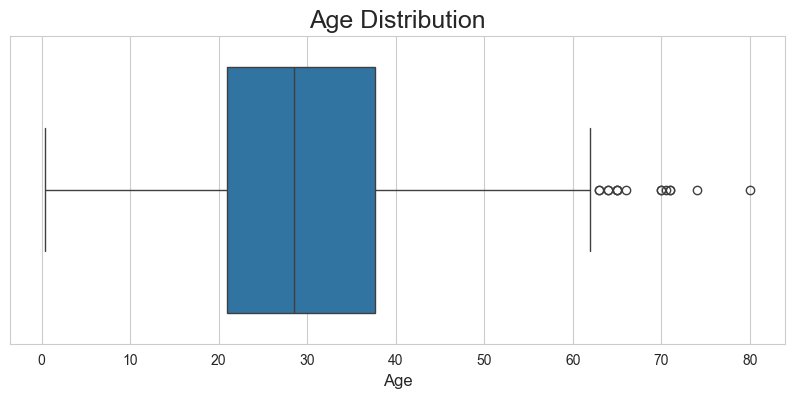

In [13]:
plt.figure(figsize=(10,4))
sns.boxplot(x=titanic_merged.Age, orient='h')
plt.title('Age Distribution', size=18)
plt.xlabel('Age', size=12)
plt.show()

In [30]:
# Finding Outliers for Age
Q1_age = titanic_merged['Age'].quantile(0.25)
Q3_age = titanic_merged['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age

outliers_age = titanic_merged[(titanic_merged['Age'] < lower_bound_age) | (titanic_merged['Age'] > upper_bound_age)]
print(titanic_merged.shape)
outliers_age.info()


(891, 19)
<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 33 to 851
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         15 non-null     float64
 1   Survived            15 non-null     float64
 2   Pclass              15 non-null     float64
 3   Age                 15 non-null     float64
 4   SibSp               15 non-null     float64
 5   Parch               15 non-null     float64
 6   Fare                15 non-null     float64
 7   Name                15 non-null     object 
 8   Sex                 15 non-null     object 
 9   Family Size         15 non-null     float64
 10  Encoded Sex         15 non-null     int64  
 11  Title_Miss          15 non-null     bool   
 12  Title_Mr            15 non-null     bool   
 13  Title_Mrs           15 non-null     bool   
 14  Title_Officer       15 non-null     bool   
 15  Title_Royalty       15 non-null     bool   
 16  Tit

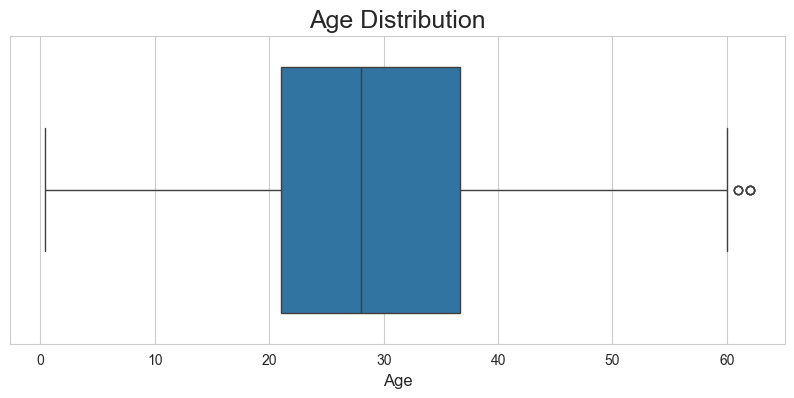

In [15]:
# Handling Outliers using Row Removal
titanic_removed = titanic_merged[(titanic_merged['Age'] >= lower_bound_age) & (titanic_merged['Age'] <= upper_bound_age)]

plt.figure(figsize=(10,4))
sns.boxplot(x=titanic_removed.Age, orient='h')
plt.title('Age Distribution', size=18)
plt.xlabel('Age', size=12)
plt.show()

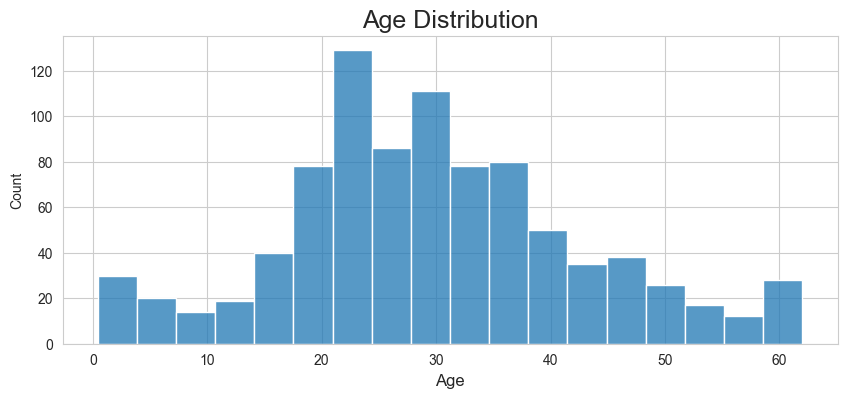

In [29]:
# Handling Outliers using Quantile Capping (0.98)
titanic_capped = titanic_merged.copy()
upper_cap_age = titanic_capped['Age'].quantile(0.98)

# Apply quantile capping (replace values outside the bounds)
titanic_capped['Age'] = titanic_capped['Age'].clip(upper=upper_cap_age)

plt.figure(figsize=(10,4))
sns.histplot(titanic_capped.Age)
plt.title('Age Distribution', size=18)
plt.xlabel('Age', size=12)
plt.show()

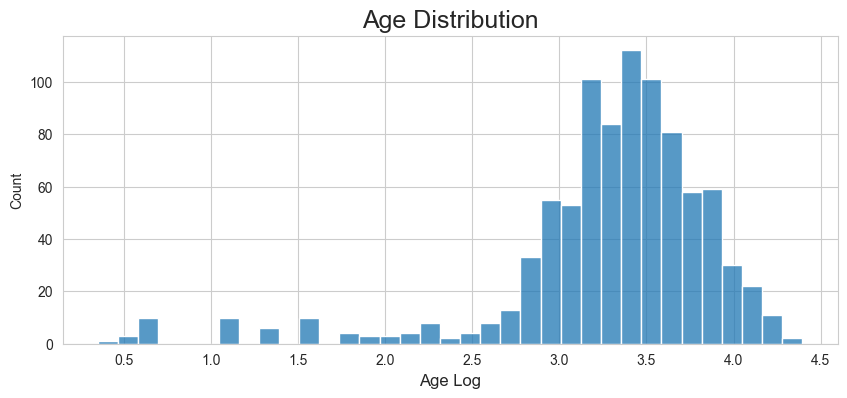

In [17]:
# Handling Outliers by Log Transformation
titanic_merged['Age_Logged'] = np.log1p(titanic_merged['Age'])

plt.figure(figsize=(10,4))
sns.histplot(x=titanic_merged.Age_Logged)
plt.title('Age Distribution', size=18)
plt.xlabel('Age Log', size=12)
plt.show()

## Fare Distribution

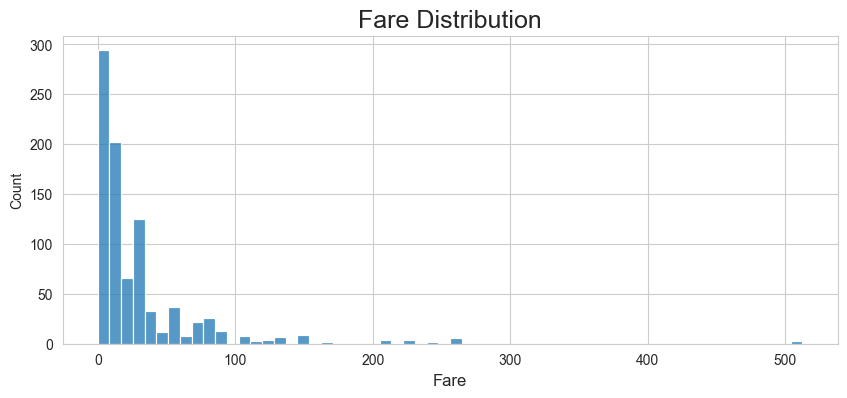

In [18]:
plt.figure(figsize=(10,4))
sns.histplot(titanic_merged.Fare)
plt.title('Fare Distribution', size=18)
plt.xlabel('Fare', size=12)
plt.show()

In [19]:
# Finding Outliers for Fare
Q1_fare = titanic_merged['Fare'].quantile(0.25)
Q3_fare = titanic_merged['Fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare
lower_bound_fare = Q1_fare - 1.5 * IQR_fare
upper_bound_fare = Q3_fare + 1.5 * IQR_fare

outliers_fare = titanic_merged[(titanic_merged['Fare'] < lower_bound_fare) | (titanic_merged['Fare'] > upper_bound_fare)]
outliers_fare.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116 entries, 1 to 879
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         116 non-null    float64
 1   Survived            116 non-null    float64
 2   Pclass              116 non-null    float64
 3   Age                 116 non-null    float64
 4   SibSp               116 non-null    float64
 5   Parch               116 non-null    float64
 6   Fare                116 non-null    float64
 7   Name                116 non-null    object 
 8   Sex                 116 non-null    object 
 9   Family Size         116 non-null    float64
 10  Encoded Sex         116 non-null    int64  
 11  Title_Miss          116 non-null    bool   
 12  Title_Mr            116 non-null    bool   
 13  Title_Mrs           116 non-null    bool   
 14  Title_Officer       116 non-null    bool   
 15  Title_Royalty       116 non-null    bool   
 16  Title_the Cou

In [20]:
# Handling Outliers using Row Removal
titanic_removed = titanic_merged[(titanic_merged['Fare'] >= lower_bound_fare) & (titanic_merged['Fare'] <= upper_bound_fare)]

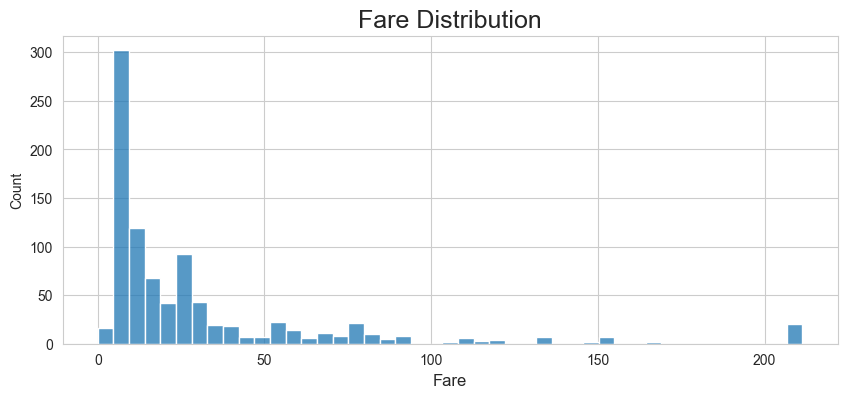

In [21]:
# Handling Outliers using Quantile Capping (0.98)
upper_cap_fare = titanic_merged['Fare'].quantile(0.98)
titanic_capped['Fare'] = titanic_merged['Fare'].clip(upper=upper_cap_fare)

plt.figure(figsize=(10,4))
sns.histplot(titanic_capped.Fare)
plt.title('Fare Distribution', size=18)
plt.xlabel('Fare', size=12)
plt.show()


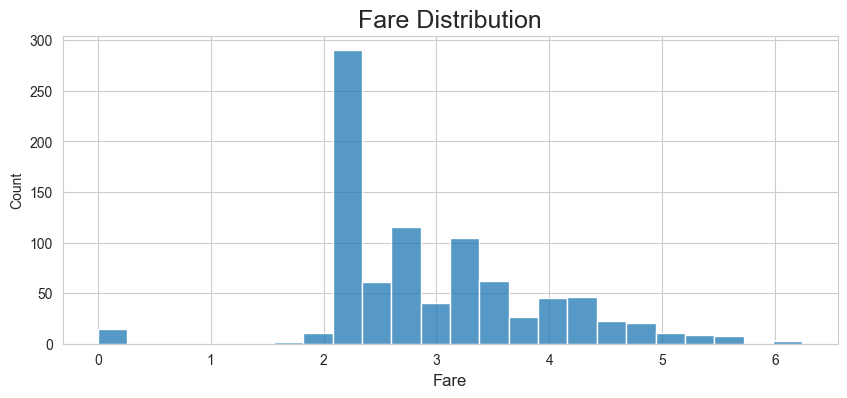

In [22]:
# Handling Outliers using Log Transformation
titanic_merged['Fare_Logged'] = np.log1p(titanic_merged['Fare'])

plt.figure(figsize=(10,4))
sns.histplot(titanic_merged.Fare_Logged)
plt.title('Fare Distribution', size=18)
plt.xlabel('Fare', size=12)
plt.show()


## Updating Dataset with outliers from Age/Fare removed

In [23]:
# Create a Copy to not destroy the partially cleaned data
titanic_cleaned = titanic_merged.copy()

# Quantile Capping was the Best Solution for handling Age and Fare Outliers
titanic_cleaned['Age'] = titanic_cleaned['Age'].clip(upper=upper_cap_age)
titanic_cleaned['Fare'] = titanic_cleaned['Fare'].clip(upper=upper_cap_fare)

# Check Cleaned Columns
titanic_cleaned.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family Size,Encoded Sex,Age_Logged,Fare_Logged
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.668324,0.523008,0.381594,30.678483,1.904602,0.647587,3.285207,2.962246
std,257.353842,0.486592,0.836071,13.322119,1.102743,0.806057,39.904946,1.613459,0.477990,0.627212,0.969048
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.000000,0.350657,0.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400,1.000000,0.000000,3.091042,2.187218
50%,446.000000,0.000000,3.000000,28.500000,0.000000,0.000000,14.454200,1.000000,1.000000,3.384390,2.737881
75%,668.500000,1.000000,3.000000,37.666667,1.000000,0.000000,31.000000,2.000000,1.000000,3.654978,3.465736
max,891.000000,1.000000,3.000000,65.000000,8.000000,6.000000,211.337500,11.000000,1.000000,4.394449,6.240917


# Exercise 5: Data Standardization and Normalization

In [24]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_std = StandardScaler()
scaler_mm = MinMaxScaler()

# Use StandardScaler (mean = 0, std = 1) for normally distributed features
titanic_cleaned['Age_Scaled'] = scaler_std.fit_transform(titanic_cleaned[['Age']])

# Use MinMaxScaler (range [0, 1]) for features that are skewed or bounded
titanic_cleaned['Fare_Scaled'] = scaler_mm.fit_transform(titanic_cleaned[['Fare']])

# Check
titanic_cleaned.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family Size,Encoded Sex,Age_Logged,Fare_Logged,Age_Scaled,Fare_Scaled
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,8.910000e+02,891.000000
mean,446.000000,0.383838,2.308642,29.668324,0.523008,0.381594,30.678483,1.904602,0.647587,3.285207,2.962246,-1.794300e-16,0.145163
std,257.353842,0.486592,0.836071,13.322119,1.102743,0.806057,39.904946,1.613459,0.477990,0.627212,0.969048,1.000562e+00,0.188821
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.000000,0.350657,0.000000,-2.196704e+00,0.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400,1.000000,0.000000,3.091042,2.187218,-6.510370e-01,0.037430
50%,446.000000,0.000000,3.000000,28.500000,0.000000,0.000000,14.454200,1.000000,1.000000,3.384390,2.737881,-8.774731e-02,0.068394
75%,668.500000,1.000000,3.000000,37.666667,1.000000,0.000000,31.000000,2.000000,1.000000,3.654978,3.465736,6.007179e-01,0.146685
max,891.000000,1.000000,3.000000,65.000000,8.000000,6.000000,211.337500,11.000000,1.000000,4.394449,6.240917,2.653596e+00,1.000000


# Exercise 6: Feature Encoding

Feature encoding was already completed in Exercise 3

In [25]:
# # Feature Encoding was already completed in Exercise 3
# # Encoding
# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()

# # Label Encoding 'Sex' Column
# titanic_merged['Encoded Sex'] = encoder.fit_transform(titanic_merged['Sex'])

# # One-Hot Encoding 'Titles Columns'
# titanic_merged = pd.get_dummies(titanic_merged, columns=['Title'], drop_first=True)

# titanic_merged.info()

# Exercise 7: Data Transforming For Age Feature

In [26]:
# Use pd.cut() to create bins for life stages (e.g. child, teen, adult, senior)
age_bins = [0, 12, 18, 60, 100]
age_labels = ['Child', 'Teen', 'Adult', 'Senior']

titanic_cleaned['Age_bins'] = pd.cut(titanic_cleaned['Age'], bins=age_bins, labels=age_labels, right=True)

titanic_cleaned['Age_bins'].value_counts(sort=False)

Age_bins
Child      71
Teen       80
Adult     718
Senior     22
Name: count, dtype: int64

In [27]:
# Apply one-hot encoding
age_dummies = pd.get_dummies(titanic_cleaned['Age_bins'], prefix='Age')

# Combine with original DataFrame (optional)
titanic_final = pd.concat([titanic_cleaned, age_dummies], axis=1)

# Check the result
titanic_final.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Family Size,...,Title_the Countess,Age_Logged,Fare_Logged,Age_Scaled,Fare_Scaled,Age_bins,Age_Child,Age_Teen,Age_Adult,Age_Senior
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,"Braund, Mr. Owen Harris",male,2.0,...,False,3.135494,2.110213,-0.575932,0.034305,Adult,False,False,True,False
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,...,False,3.663562,4.280593,0.625753,0.337296,Adult,False,False,True,False
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,"Heikkinen, Miss. Laina",female,1.0,...,False,3.295837,2.188856,-0.275511,0.037499,Adult,False,False,True,False
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,...,False,3.583519,3.990834,0.400437,0.251257,Adult,False,False,True,False
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,"Allen, Mr. William Henry",male,1.0,...,False,3.583519,2.202765,0.400437,0.038091,Adult,False,False,True,False
